## Imports

In [7]:
%run models/__init__.py

In [8]:
%run utils.py

In [9]:
%run utilsT.py

In [10]:
%run utilsTesting.py

In [11]:
%run -n train.py

In [12]:
device = get_torch_device()
device

device(type='cuda')

## Load model

In [7]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [8]:
model, model_name, optimizer, opt_name, loss_name, loss_params, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)

In [9]:
_ = model.train(False)

## Load data

In [13]:
BATCH_SIZE = 4

In [14]:
%%time
dataset, dataloader = prepare_data(DATASET_DIR, "test", None, BATCH_SIZE, max_images=None)
n_images, n_diseases = dataset.size()
n_images, n_diseases

CPU times: user 31.4 s, sys: 212 ms, total: 31.6 s
Wall time: 31.7 s


(25596, 14)

## Load confusion matrix

In [20]:
train_cms = np.load(CMS_DIR + "/" + run_name + "_train.npy") # train, val or all
train_cms.shape

(1, 2, 2)

In [21]:
val_cms = np.load(CMS_DIR + "/" + run_name + "_val.npy") # train, val or all
val_cms.shape

(1, 2, 2)

In [22]:
n_diseases, _, _ = train_cms.shape
n_diseases

1

Left: training
Right: validation


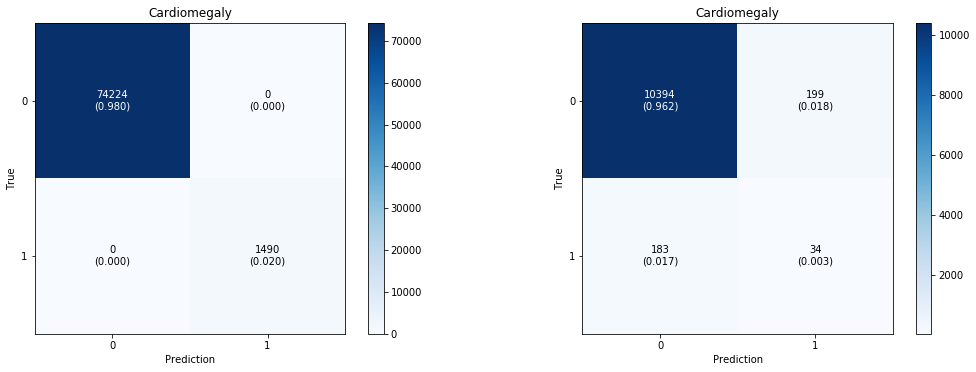

In [23]:
classes = [0, 1] # negative, positive

plt.figure(figsize=(18,80/14 * n_diseases))
plot_train_val_cms(train_cms, val_cms, classes, chosen_diseases, percentage=True)

## Plot activations and bboxes

Use confusion matrix with names (i.e. choose true positive examples, false positive, etc)

In [32]:
%run utils.py
%run utilsTesting.py

In [15]:
def get_cms_names(run_name, disease_name):
    fname = CMS_DIR + "/" + run_name + "_test_names"

    TP, FP, TN, FN, cm = load_cms_names(fname, disease_name)
    print(cm)
    return TP, FP, TN, FN, cm

In [16]:
def calculate_plot_activations(image_name, disease_name=None):
    image, gt, prediction, bboxes, activation = gen_image_with_bbox(model,
                                                                dataset,
                                                                image_name,
                                                                chosen_diseases,
                                                                device,
                                                               )

    plt.figure(figsize=(15, 5))

    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 2, 1)
    plot_image_with_bbox(image, image_name, bboxes)
    
    plt.subplot(1, 2, 2)
    plot_activation(activation, prediction, gt, chosen_diseases, disease_name=disease_name)

### Cardiomegaly examples

In [17]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [18]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [19]:
TP, FP, TN, FN, cm = get_cms_names(run_name, "Cardiomegaly")

[[24048   479]
 [  852   217]]


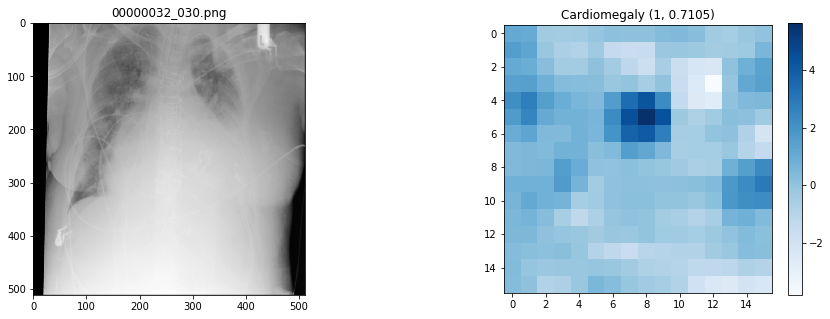

In [24]:
calculate_plot_activations(TP[0])

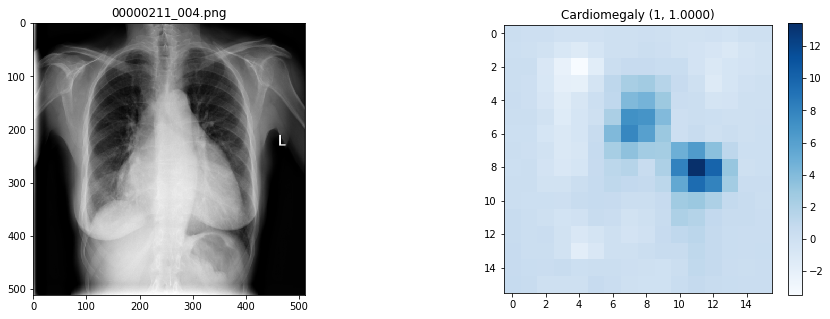

In [25]:
calculate_plot_activations(TP[2])

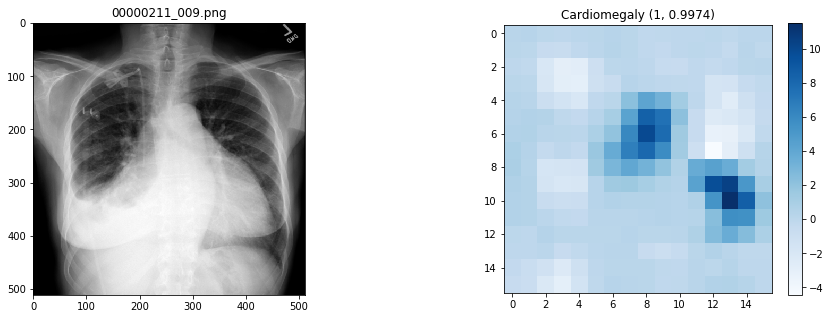

In [16]:
calculate_plot_activations(TP[6])

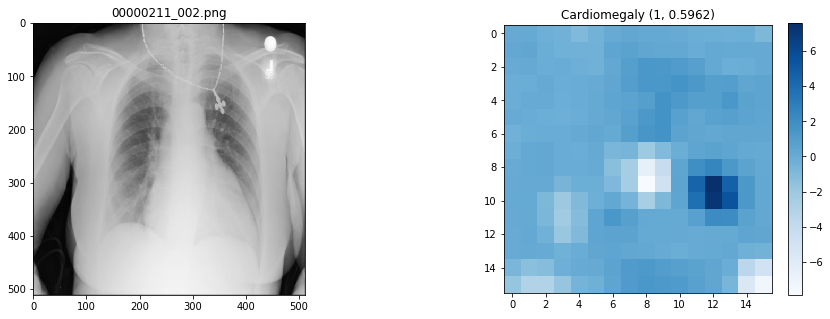

In [17]:
calculate_plot_activations(TP[1])

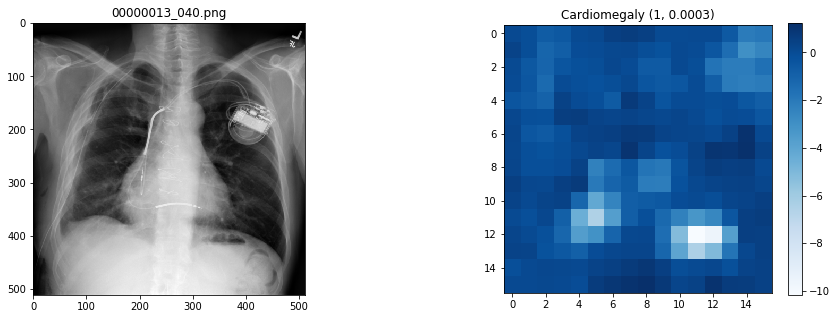

In [18]:
calculate_plot_activations(FN[7])

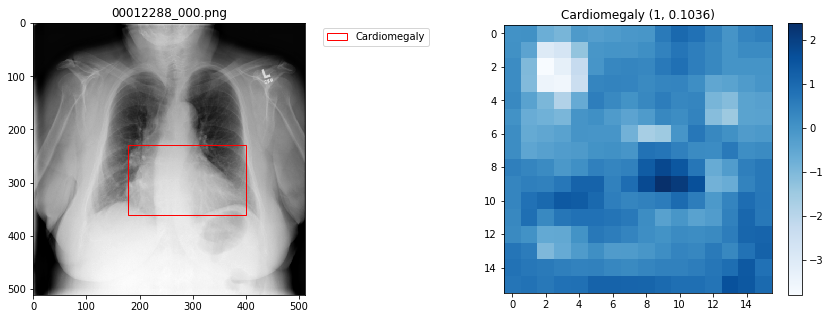

In [107]:
calculate_plot_activations("00012288_000.png")

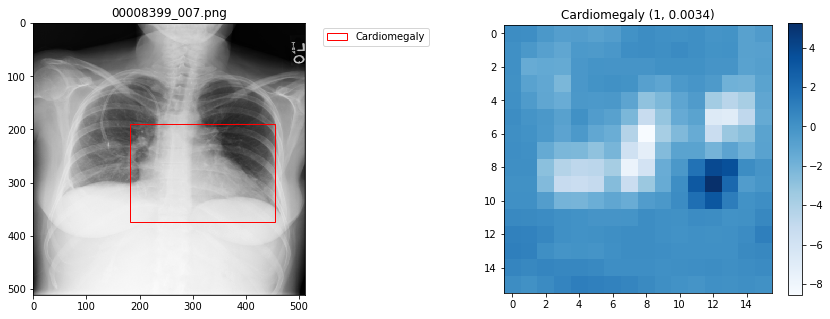

In [108]:
calculate_plot_activations("00008399_007.png")

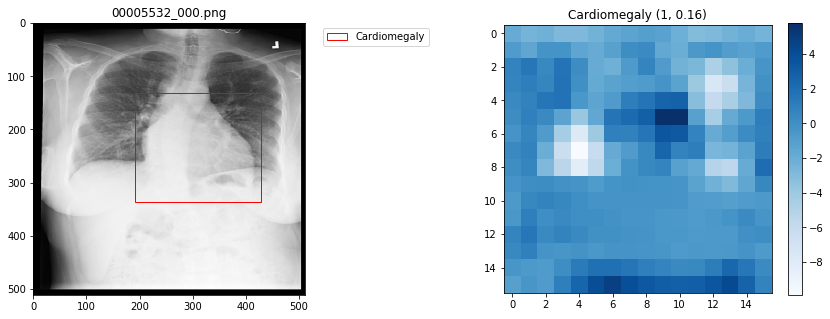

In [65]:
calculate_plot_activations("00005532_000.png")

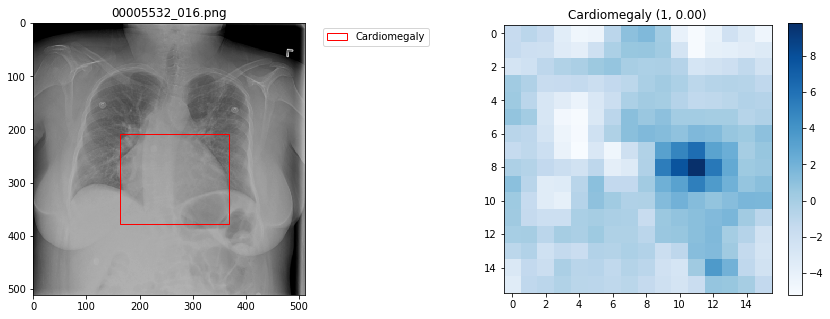

In [67]:
calculate_plot_activations("00005532_016.png")

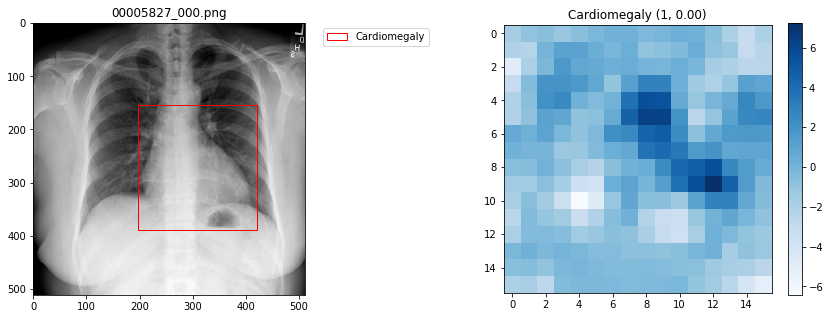

In [68]:
calculate_plot_activations("00005827_000.png")

### Pneumothorax examples

In [20]:
run_name = "1127_035613_resnet_v3_wd0.5_Pneumothorax"

In [21]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [24]:
TP, FP, TN, FN, cm = get_cms_names(run_name, "Pneumothorax")

[[20950  1981]
 [ 1636  1029]]


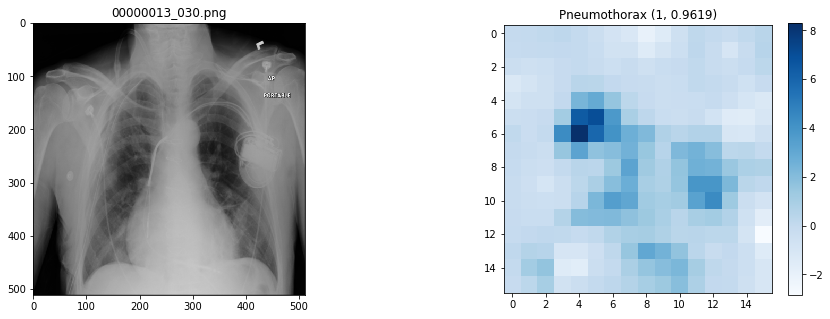

In [42]:
calculate_plot_activations(TP[5], disease_name="Pneumothorax")

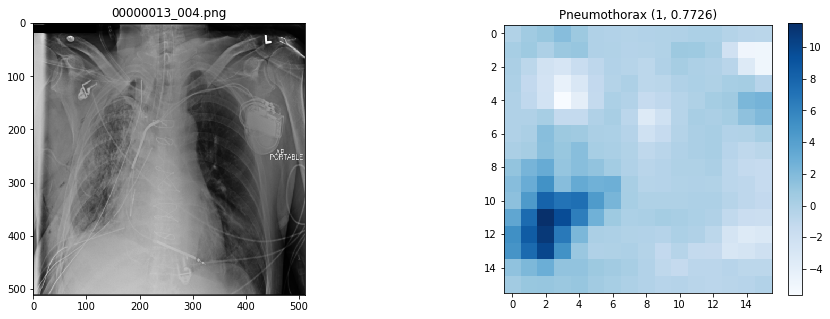

In [26]:
calculate_plot_activations(TP[1], disease_name="Pneumothorax")

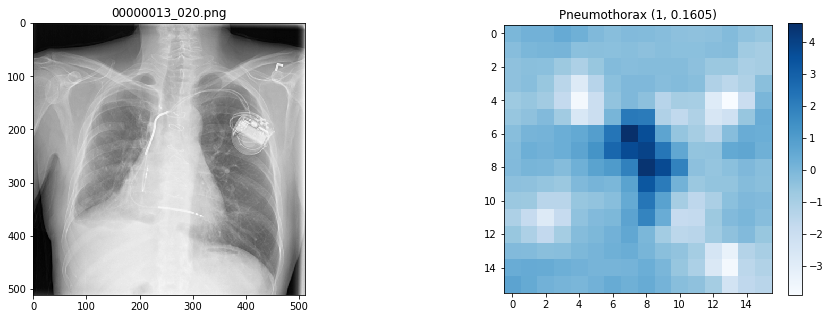

In [38]:
calculate_plot_activations(FN[4], disease_name="Pneumothorax")

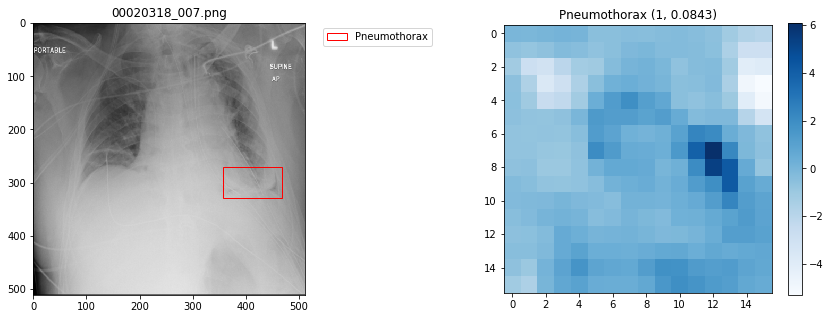

In [43]:
calculate_plot_activations("00020318_007.png", "Pneumothorax")

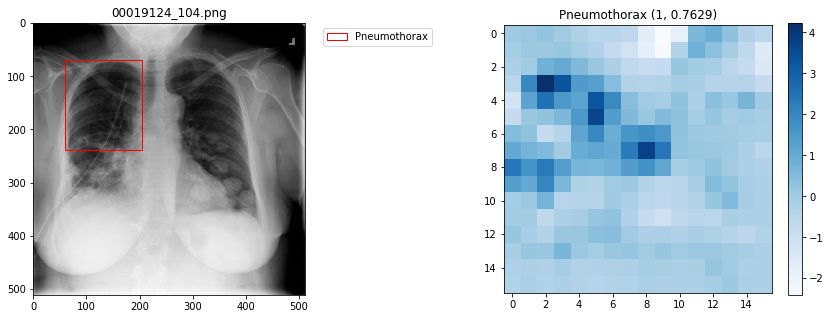

In [44]:
calculate_plot_activations("00019124_104.png", "Pneumothorax")

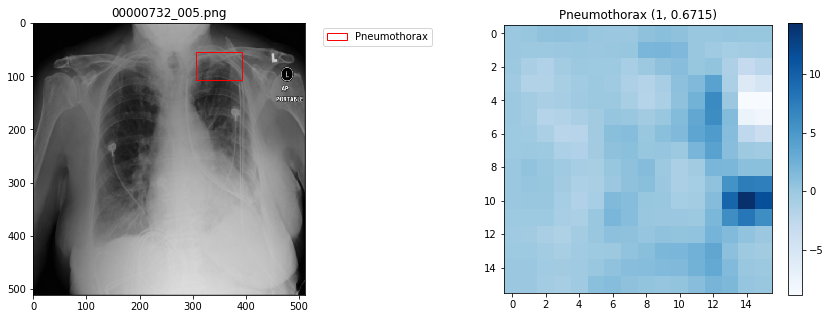

In [45]:
calculate_plot_activations("00000732_005.png", "Pneumothorax")